# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d zaurbegiev/my-dataset

Dataset URL: https://www.kaggle.com/datasets/zaurbegiev/my-dataset
License(s): unknown
 86% 7.00M/8.14M [00:00<00:00, 61.4MB/s]
100% 8.14M/8.14M [00:00<00:00, 64.0MB/s]


In [5]:
!unzip my-dataset.zip

Archive:  my-dataset.zip
  inflating: credit_test.csv         
  inflating: credit_train.csv        


# 2. Loading Data

In [6]:
df = pd.read_csv('credit_train.csv')

In [7]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


# 3. Data Preprocessing

In [8]:
df.shape

(100514, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [10]:
df_2 = df.drop(columns = ['Loan ID', 'Customer ID'])

In [12]:
for col in df_2.columns:
    unique_values = df_2[col].dropna().unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print("*"*50)

Column: Loan Status
Unique Values: ['Fully Paid' 'Charged Off']
**************************************************
Column: Current Loan Amount
Unique Values: [  445412.   262328. 99999999. ...   486046.   100254.   274076.]
**************************************************
Column: Term
Unique Values: ['Short Term' 'Long Term']
**************************************************
Column: Credit Score
Unique Values: [ 709.  741.  721. 7290.  730.  678.  739.  728.  740.  743.  727.  723.
  747.  687.  750.  714.  724.  704.  688.  749.  746.  737.  729.  733.
  725.  745.  720.  718.  682. 7120.  680.  710.  598.  719. 6610.  652.
  736. 7380.  644.  672. 7370.  699.  751.  694.  675.  657.  748.  666.
  734.  742.  705.  731. 6240.  712.  685.  717.  722.  618.  676.  692.
 7210.  732.  649.  695.  744.  686.  637.  697.  706.  715.  707.  726.
  738. 7500.  716. 7020.  651.  708.  698.  689.  735.  703.  693. 7080.
  645.  691.  673.  700. 7140.  658.  674.  654. 7490.  681.  696.  713.

In [13]:
def clean_years(value):
    if pd.isna(value):
        return np.nan
    else :
        if value == '< 1 year':
          value = 0
        else :
          value = value.replace('+','').replace('<','').replace('years','').replace('year','')
          value = int(value)
        return value


df_2['Years in current job'] = df_2['Years in current job'].apply(clean_years)

In [14]:
df_2.isnull().sum()

,0
Loan Status,514
Current Loan Amount,514
Term,514
Credit Score,19668
Annual Income,19668
Years in current job,4736
Home Ownership,514
Purpose,514
Monthly Debt,514
Years of Credit History,514


In [15]:
df_2 = df_2.drop(columns = ['Months since last delinquent'])
df_2.shape

(100514, 16)

In [16]:
exclude_cols = ["Credit Score", "Annual Income", "Years in current job"]

# Drop NaN values from all columns except the excluded ones
df_2 = df_2.dropna(subset=[col for col in df_2.columns if col not in exclude_cols])

In [17]:
df_2.isnull().sum()

,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,19111
Annual Income,19111
Years in current job,4222
Home Ownership,0
Purpose,0
Monthly Debt,0
Years of Credit History,0


In [18]:
df_2['Loan Status'] = df_2['Loan Status'].replace({'Fully Paid': 1, 'Charged Off': 0})
df_2['Term'] = df_2['Term'].replace({'Short Term': 0, 'Long Term': 1})

<ipython-input-18-5057e1f0d88b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2['Loan Status'] = df_2['Loan Status'].replace({'Fully Paid': 1, 'Charged Off': 0})
<ipython-input-18-5057e1f0d88b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2['Term'] = df_2['Term'].replace({'Short Term': 0, 'Long Term': 1})


In [19]:
imputer = KNNImputer(n_neighbors=5)
df_2[exclude_cols] = imputer.fit_transform(df_2[exclude_cols])

In [20]:
df_2.isnull().sum()

,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,0
Annual Income,0
Years in current job,0
Home Ownership,0
Purpose,0
Monthly Debt,0
Years of Credit History,0


In [21]:
df_dummies = pd.get_dummies(df_2, columns=['Home Ownership', 'Purpose'], drop_first=True)

In [101]:
df_dummies.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,1,445412.0,0,709.0,1167493.0,8.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,True,False,False
1,1,262328.0,0,729.0,2715909.4,10.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,True,False,False
2,1,99999999.0,0,741.0,2231892.0,8.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,False,True,False
3,1,347666.0,1,721.0,806949.0,3.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,False,True,False
4,1,176220.0,0,716.0,2262869.6,5.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,False,False,True


In [23]:
df_dummies.shape

(99794, 32)

# 4. Data Analysis

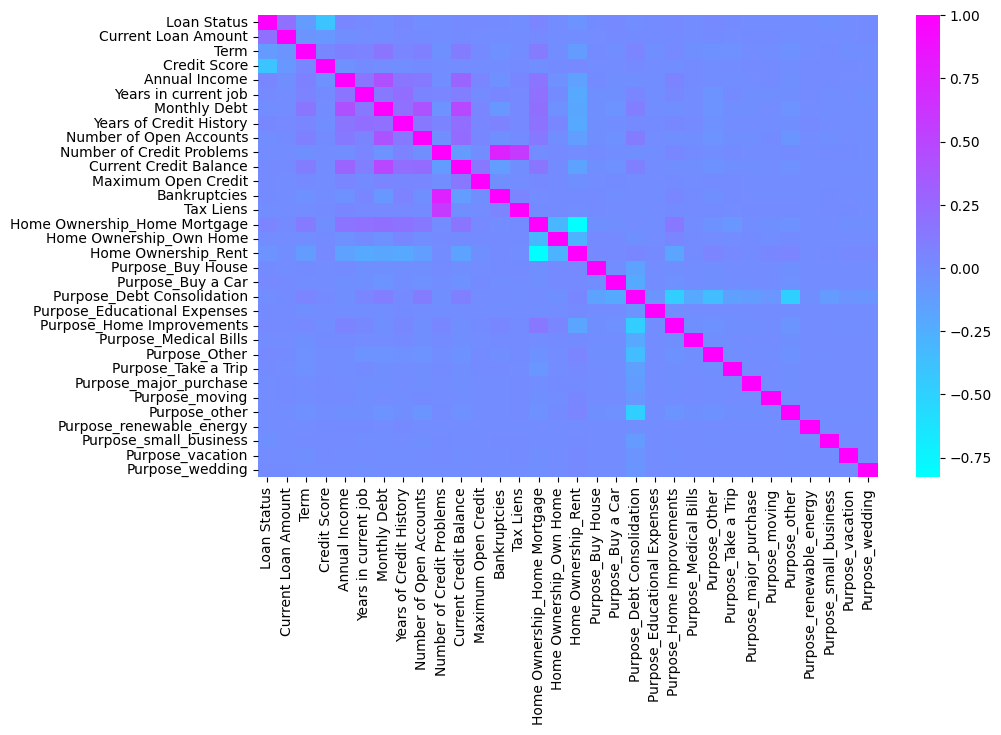

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_dummies.corr(), cmap='cool')
plt.show()

In [102]:
df_dummies = df_dummies.loc[:, ~df_dummies.columns.str.startswith('Purpose')]

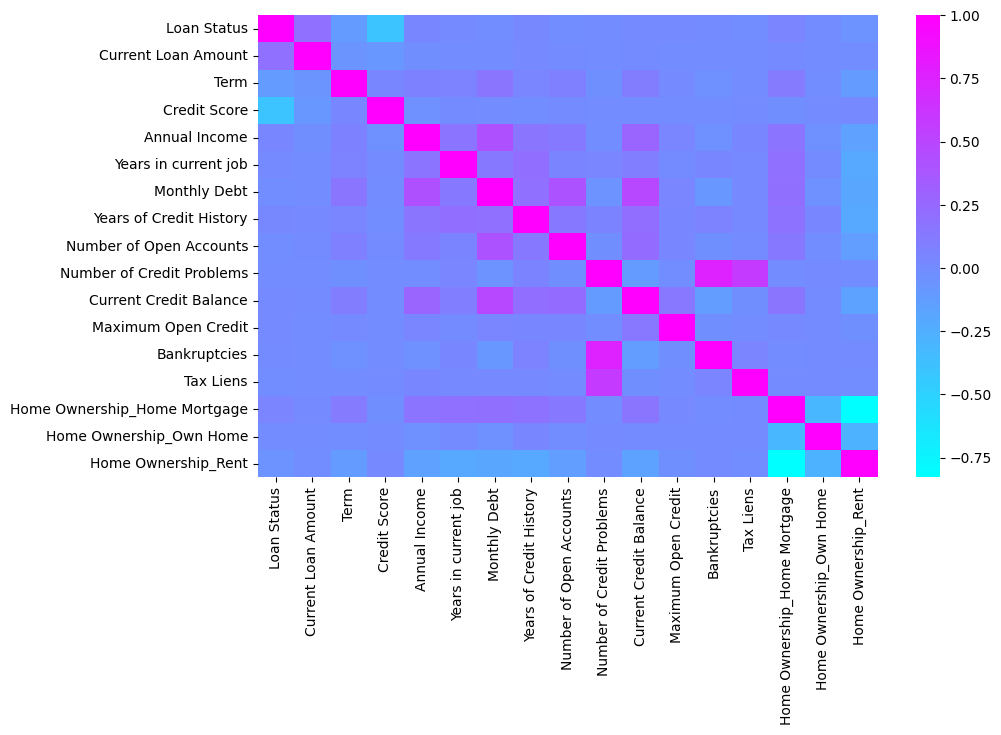

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_dummies.corr(), cmap='cool')
plt.show()


In [27]:
import matplotlib.pyplot as plt

def plot_histograms(df, columns, bins=30):
    num_cols = len(columns)
    rows = (num_cols // 3) + (num_cols % 3 > 0)  # Arrange in rows of 3

    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Flatten to easily index subplots

    for i, column in enumerate(columns):
        axes[i].hist(df[column], bins=bins, edgecolor='black', alpha=0.7)
        axes[i].set_title(f"Histogram of {column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Frequency")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [103]:
df_3 = df_dummies.copy()

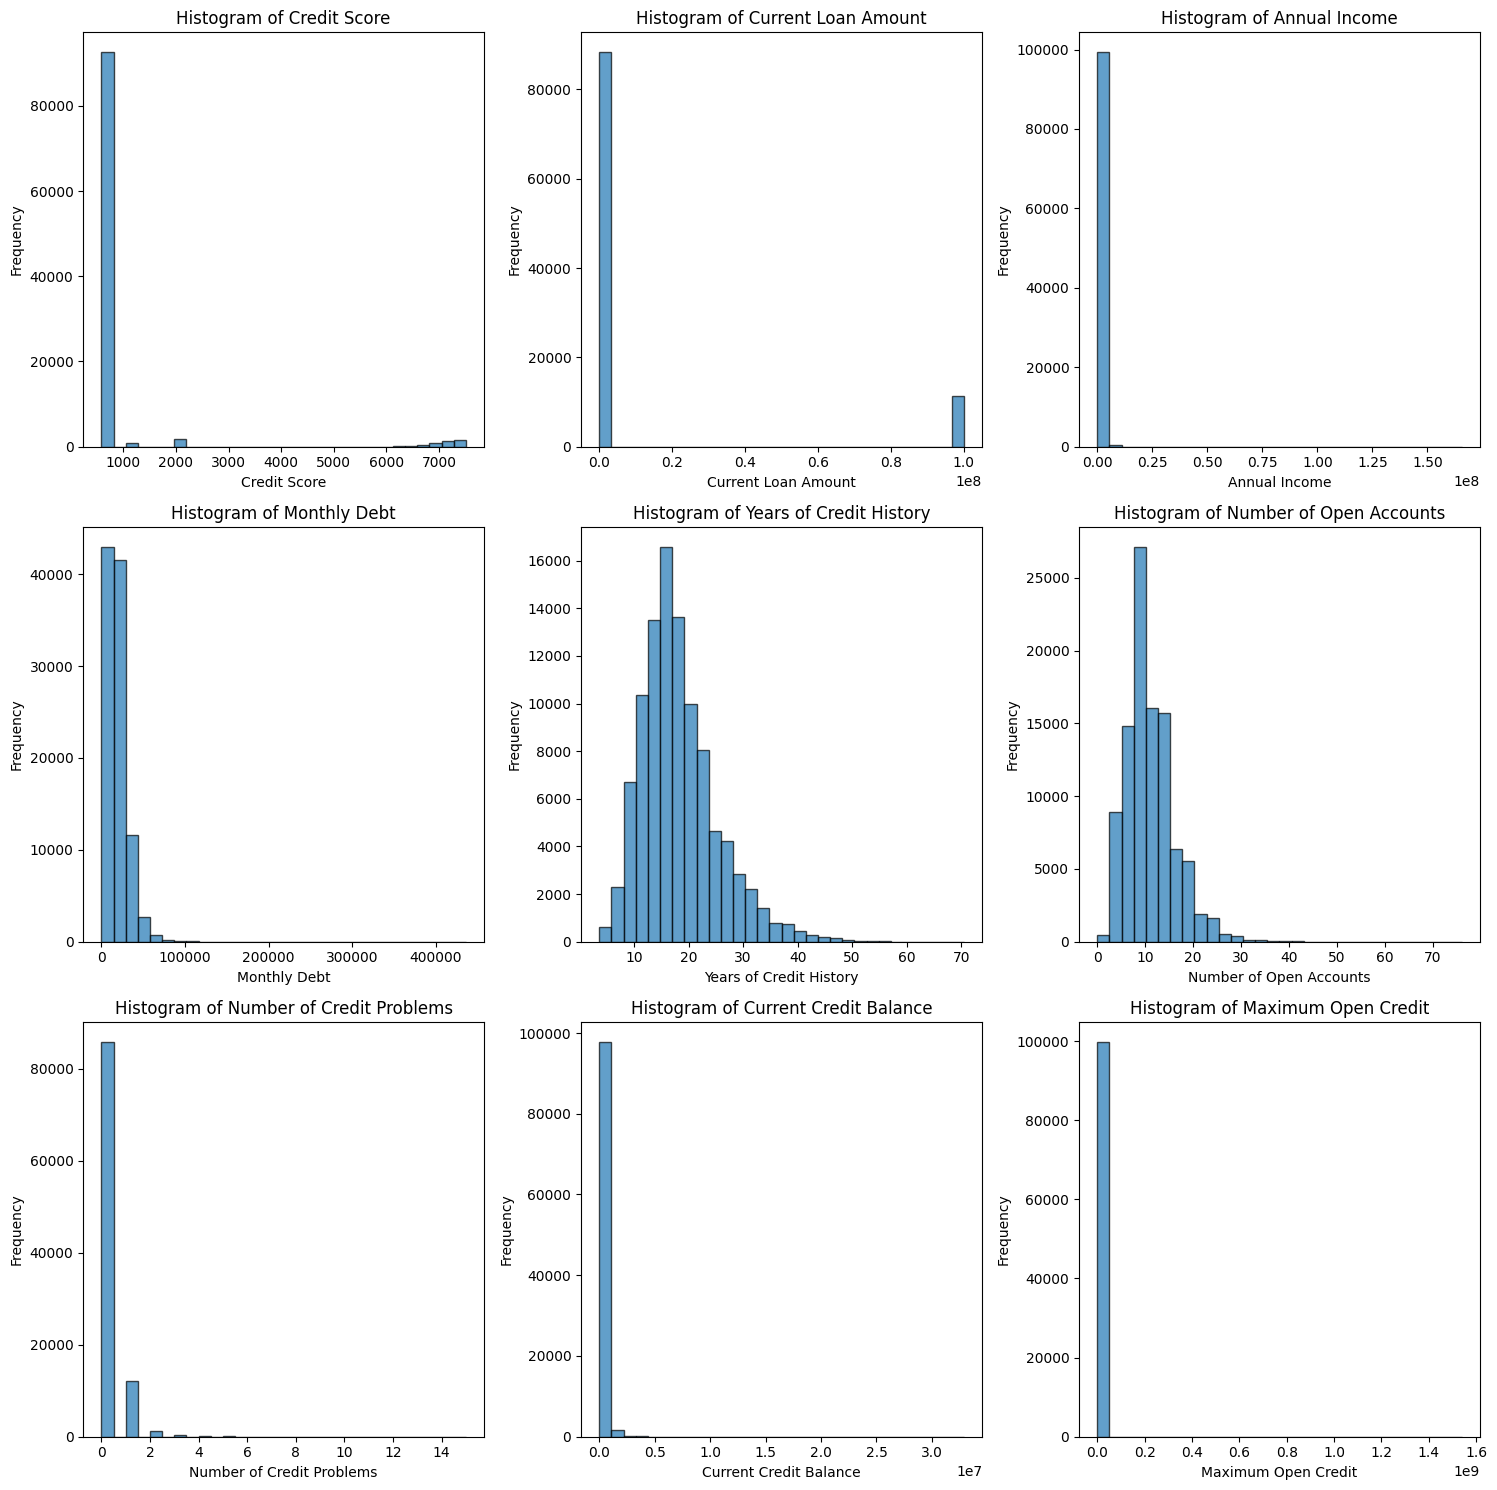

In [31]:
columns_to_plot = [
    'Credit Score','Current Loan Amount','Annual Income', 'Monthly Debt',
    'Years of Credit History', 'Number of Open Accounts',
    'Number of Credit Problems', 'Current Credit Balance',
    'Maximum Open Credit'
]

plot_histograms(df_3, columns_to_plot)

In [32]:
import matplotlib.pyplot as plt

def plot_bar_charts(df, columns):
    num_cols = len(columns)
    rows = (num_cols // 3) + (num_cols % 3 > 0)  # Arrange in rows of 3

    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Flatten to easily index subplots

    for i, column in enumerate(columns):
        value_counts = df[column].value_counts()
        axes[i].bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black', alpha=0.7)
        axes[i].set_title(f"Bar Chart of {column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)  # Rotate labels if needed

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


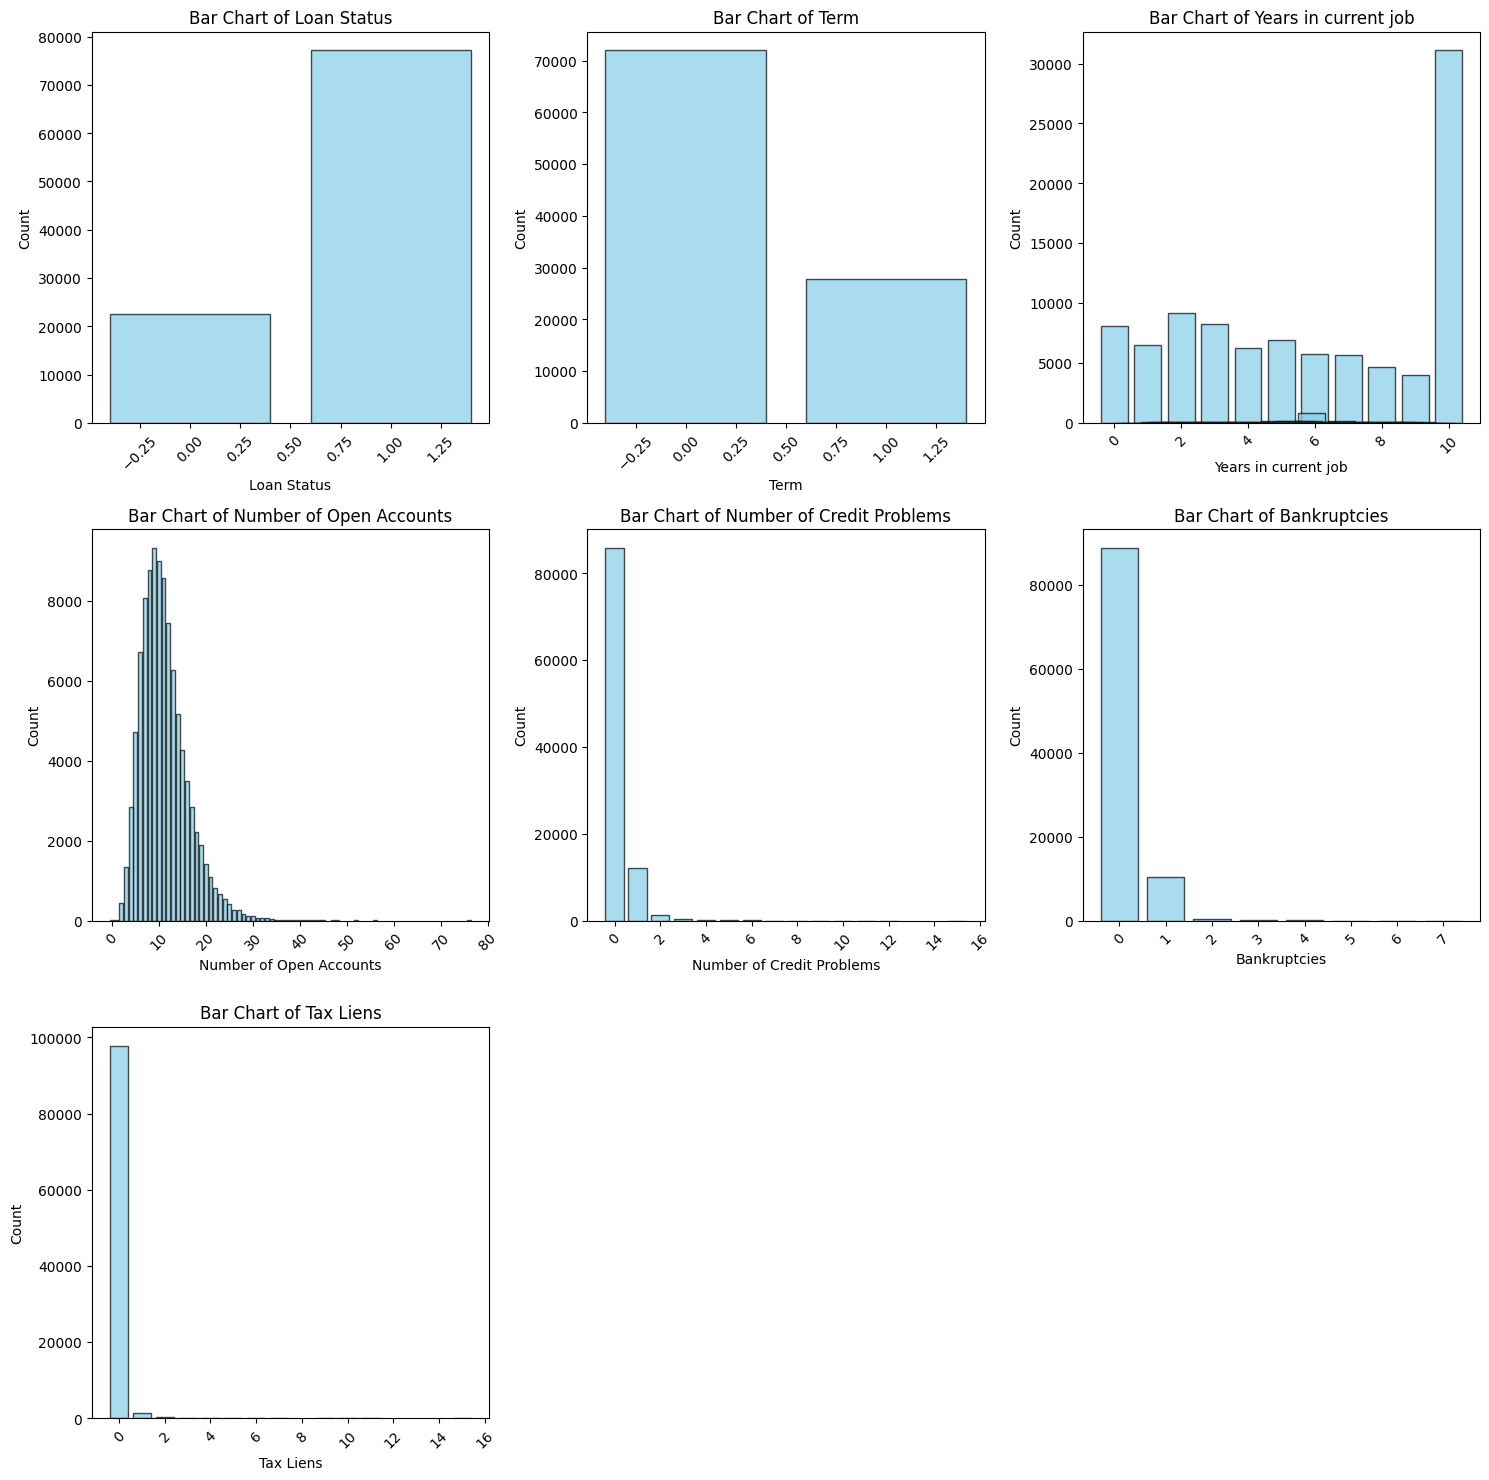

In [33]:
columns_to_plot_bar = [
    'Loan Status', 'Term',
    'Years in current job',
    'Number of Credit Problems', 'Bankruptcies', 'Tax Liens'
]

plot_bar_charts(df_3, columns_to_plot_bar)

Loan Status and Term is seem to be very much unbalanced

In [150]:
df_4 = df_3.copy()

# 5. Outlier Removing and Scaling

In [151]:
from scipy import stats
def remove_outliers_zscore(df, columns, threshold=3):
    df_filtered = df.copy()  # Avoid modifying original DataFrame
    for column in columns:
        z_scores = np.abs(stats.zscore(df_filtered[column]))
        df_filtered = df_filtered[z_scores < threshold]  # Keep only valid rows for each column
    return df_filtered




In [152]:
cols_for_zscore = [
     'Annual Income', 'Monthly Debt',
    'Years of Credit History', 'Number of Open Accounts', 'Current Credit Balance',
]
df_4 = remove_outliers_zscore(df_4, cols_for_zscore)

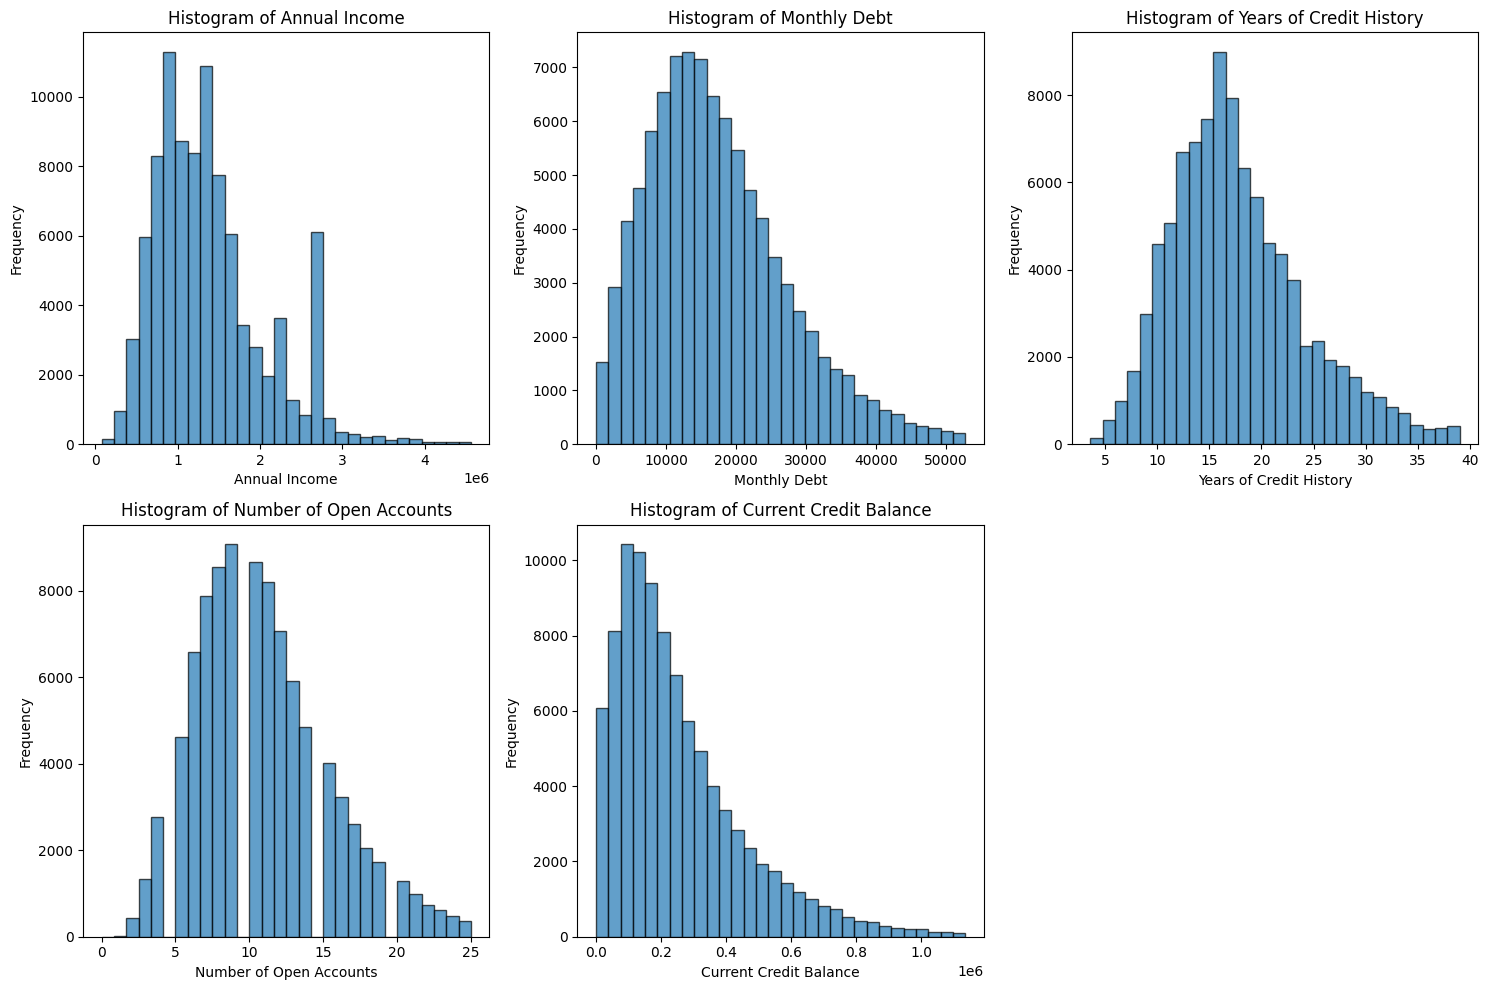

In [143]:
plot_histograms(df_4, cols_for_zscore)

In [162]:
df_5 = df_4.copy()

In [163]:
list_col = ['Credit Score', 'Current Loan Amount', 'Maximum Open Credit']

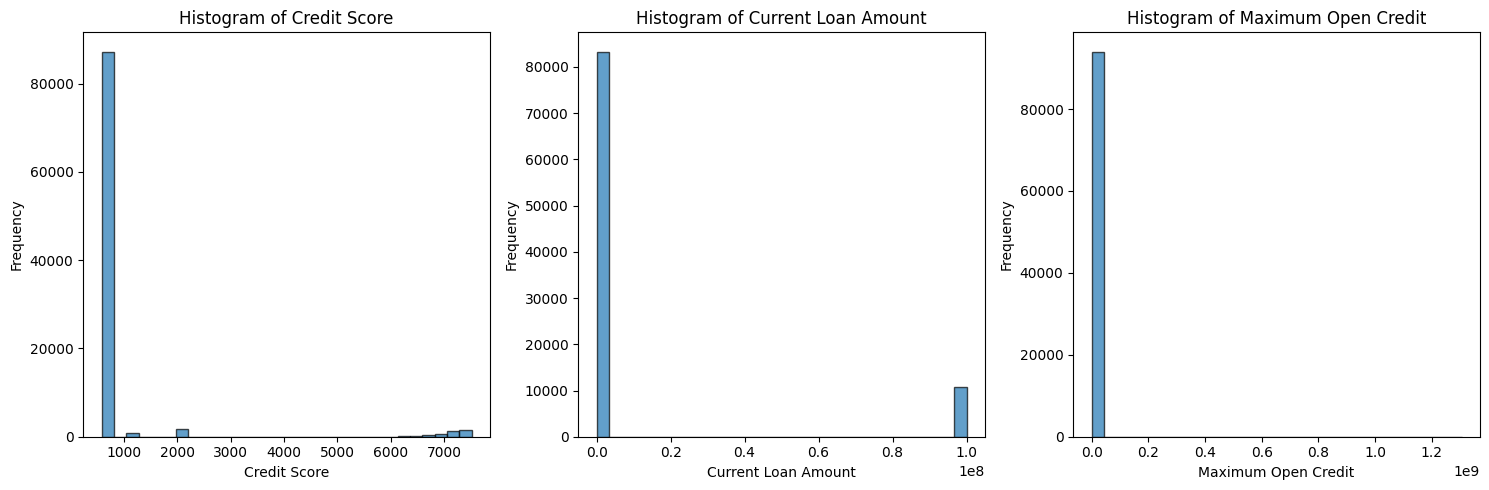

In [156]:
plot_histograms(df_5, list_col)

In [164]:
for col in list_col:
      df_5[col] = np.log1p(df_5[col])

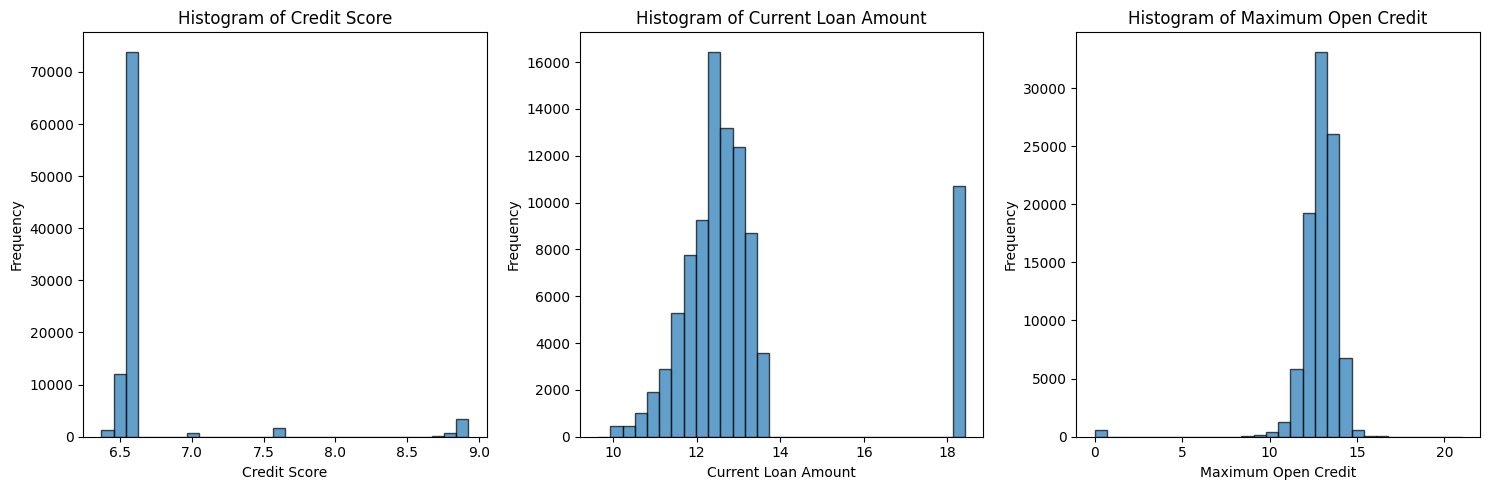

In [166]:
plot_histograms(df_5, list_col)

In [167]:
df_5 = remove_outliers_zscore(df_5, list_col)

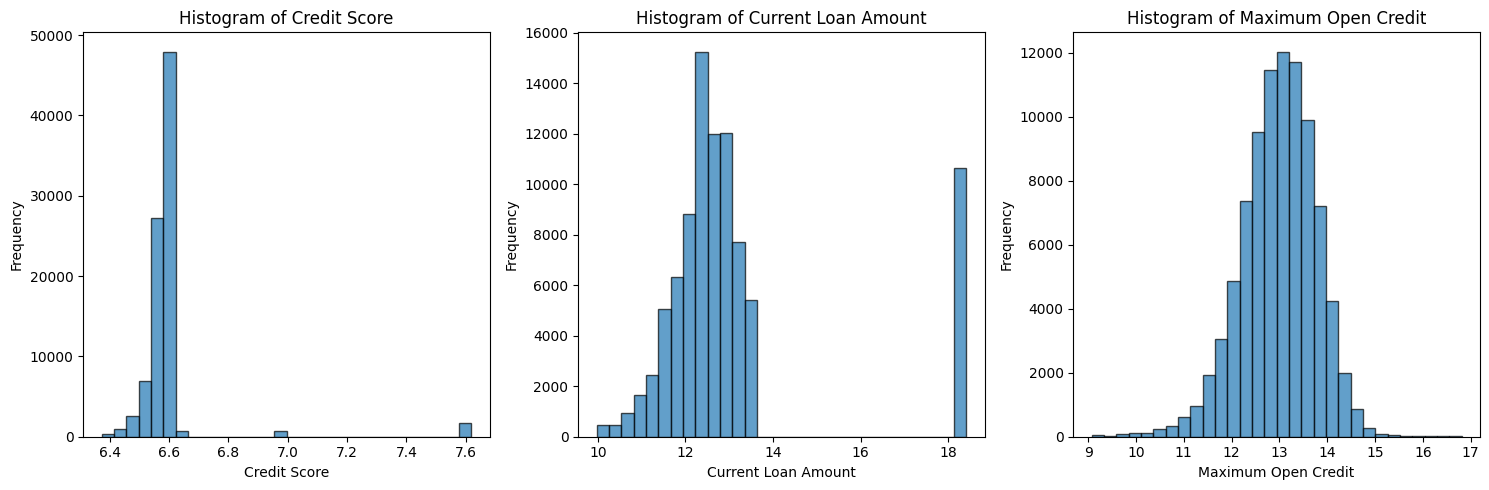

In [168]:
plot_histograms(df_5, list_col)

In [171]:
def remove_outliers_iqr(df, columns):

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df


In [172]:
df_5 = remove_outliers_iqr(df_5, list_col)

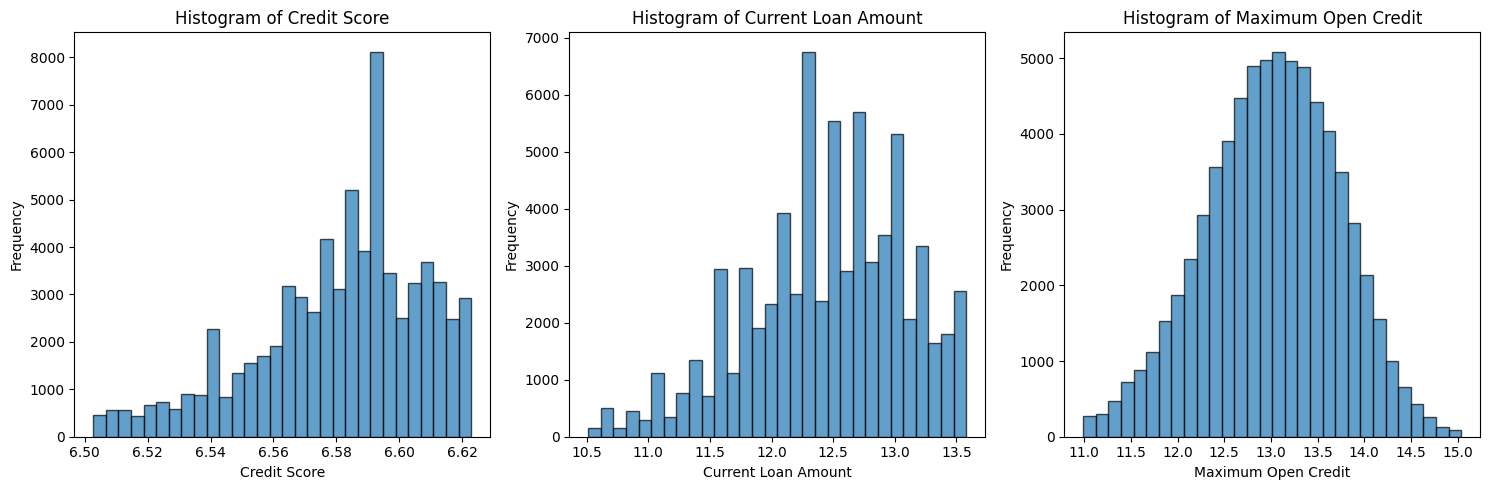

In [173]:
plot_histograms(df_5, list_col)

# 6. Handling Extremely Imbalance Data

In [174]:
df_5['Loan Status'].value_counts()

,count
Loan Status,
1,55587
0,14613


In [176]:
df_5['Term'].value_counts()

,count
Term,
0,52068
1,18132


In [226]:
X = df_5.drop(columns = ['Loan Status'])
y = df_5['Loan Status']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(
    df_5.drop(columns=['Loan Status']), df_5['Loan Status'],
    test_size=0.2, stratify=df_5['Loan Status'], random_state=42
)

In [228]:
df_test = pd.DataFrame(X_test)
df_test['Loan Status'] = y_test

# Separate class 0 and class 1
df_test_0 = df_test[df_test['Loan Status'] == 0]
df_test_1 = df_test[df_test['Loan Status'] == 1]

In [229]:
from sklearn.utils import resample
df_test_0_upsampled = resample(df_test_0,
                               replace=True,
                               n_samples=len(df_test_1),
                               random_state=42)

df_test_balanced = pd.concat([df_test_0_upsampled, df_test_1])

In [230]:
X_test_balanced = df_test_balanced.drop(columns=['Loan Status'])
y_test_balanced = df_test_balanced['Loan Status']

In [232]:
y_test_balanced.value_counts()

,count
Loan Status,
0,11117
1,11117


In [233]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())  # Imbalanced
print("\nAfter SMOTE:\n", y_train_resampled.value_counts())  # Balanced


Before SMOTE:
 Loan Status
1    44470
0    11690
Name: count, dtype: int64

After SMOTE:
 Loan Status
1    44470
0    44470
Name: count, dtype: int64


In [235]:
X_test_balanced.shape

(22234, 16)

# 7. Building Machine Learning Model

In [239]:
from xgboost import XGBClassifier

scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])

model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_balanced)

In [240]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [242]:
accuracy = accuracy_score(y_test_balanced, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test_balanced, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_balanced, y_pred))

Accuracy Score: 0.5218

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.07      0.12     11117
           1       0.51      0.98      0.67     11117

    accuracy                           0.52     22234
   macro avg       0.63      0.52      0.40     22234
weighted avg       0.63      0.52      0.40     22234


Confusion Matrix:
 [[  739 10378]
 [  254 10863]]


In [243]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=skf, scoring='accuracy')

print(f"Cross-Validation Accuracy: {scores.mean():.4f}")

Cross-Validation Accuracy: 0.8541


Since its a classification process, we will look more into the precision score, and the cross fold validation gives us a nice accuracy and a nice precision in this type of unblanaced data